# Rechenaufgaben zu 4.1 (Markov-Entscheidungsprozesse)

---

## Rechenaufgabe 1

**Aufgaben:**

- Formalisieren Sie den Zustandsraum $S$, den Aktionsraum $A$, den Startzustand $s^0$ und die Menge der Zielzustände $S^t$ bezüglich des folgenden Szenarios.
- Zeichnen Sie ein Zustandsübergangsdiagramm zu der obigen Beschreibung. Beziehen Sie dabei auch die Transitionswahrscheinlichkeitsfunktion $P$ und die Belohnungsfunktion $R$ ein.

In einer Firma sind Rollläden angebracht, die tagsüber über einen Sensor detektieren, ob die Sonne auf sie scheint und sie somit herunter fahren sollen, bzw. ob sie wieder hoch fahren sollen, falls die Sonne nicht mehr scheint. 

Es gibt also die Zustände:

- $s_o^s$ (die Sonne scheint und der Rollladen ist oben)
- $s_u^s$ (die Sonne scheint und der Rollladen ist unten)
- $s_o^w$ (es ist bewölkt und der Rollladen ist oben) und
- $s_u^w$ (es ist bewölkt und der Rollladen ist unten).

Zusätzlich gibt es den Zustand $s^t$, der den finalen Zustand (das Ende eines Tages) symbolisiert. Als Startzustand nehmen wir $s_o^s$ an.


Weiterhin gibt es folgende Aktionen:

- *hoch*: der Rollladen fährt hoch (Erfolgswahrscheinlichkeit von 80 %)
- *runter*: der Rolladen fährt runter (Erfolgswahrscheinlichkeit von 80 %)
- *detektiere*: der Sensor im Rollladen detektiert, ob die Sonne scheint oder nicht (detektiert zu 30 % einen Wechsel von Sonne auf bewölkt bzw. umgekehrt)
- *beendeTag*: der Tag wird beendet

Wir vergeben folgende Belohnungen:

- Fährt der Rollladen erfolgreich runter, wenn er oben ist und die Sonne scheint, erhält er 15 Punkte. 
- Fährt der Rollladen erfolgreich hoch, wenn er unten ist und es bewölkt ist, erhält er ebenfalls 15 Punkte.
- Fährt der Rollladen fälschlicherweise hoch, obwohl die Sonne scheint oder herunter, wenn es bewölkt ist, verliert er 10 Punkte.
- Wird hoch ausgeführt, obwohl der Rollladen bereits oben ist oder wird runter ausgeführt, wenn er bereits unten ist, werden für die unnötige Energieverschwendung 3 Punkte abgezogen.
- Die Aktion detektiere kostet stets 2 Punkte.
- Die Aktion beendeTag gibt 10 Punkte, wenn der Rollladen unten ist und die Sonne scheint oder oben ist und es bewölkt ist. Ansonsten gibt es 10 Punkte Abzug.
- Für alle weiteren Situationen beträgt die Belohnung 0 Punkte.

**Antwort:**

Sehr simpel:

- $S=\{s_o^s, s_u^s, s_o^w, s_u^w\}$
- $A=\{\text{hoch, runter, detektiere, beendeTag}\}$
- $s^0=s_o^s$
- $S^t=\{s^t\}$

Und damit

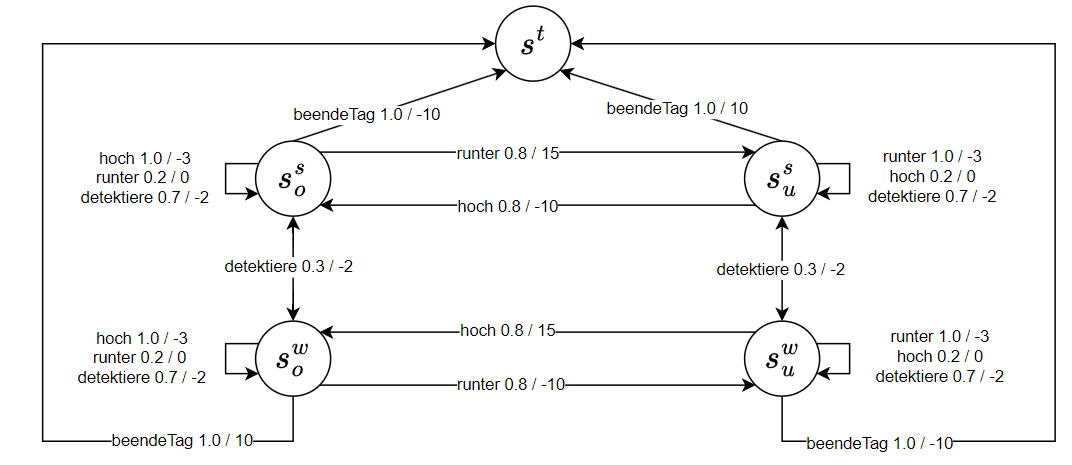

---

## Rechenaufgabe 2

Betrachten Sie den in der vorherigen Aufgabe formalisierten Markov-Entscheidungsprozess $D = (S, A, P, R, s^0, S^t)$.

Sei nun die folgende Episode gegeben:

$$
e = (s_o^s , \textit{detektiere} , s_o^s , \textit{runter} , s_u^s , \textit{beendeTag}, s^t)
$$

**Aufgaben:**

1. Berechnen Sie die Wahrscheinlichkeit $P(e)$.
2. Berechnen Sie den diskontierten Nutzen $U^\gamma_D(e)$ mit einem Discountfaktor von $\gamma = 0.9$.

**Antwort:**

Die Wahrscheinlichkeit $P(e)$ ergibt sich als Produkt der Wahrscheinlichkeiten:

$$
\begin{aligned}
P(e)
&= \prod_{i=1}^3 P(s_{i-1}, a_i, s_i)\\
&= P(s^s_o, \textit{detektiere}, s^s_o) P(s^s_o, \textit{runter}, s^s_u) P(s^s_u, \textit{beendeTag}, s^t)\\
&= 0.7 \cdot 0.8 \cdot 1 = 0.56
\end{aligned}
$$

Den diskontierten Nutzen $U^\gamma_D(e)$ erhalten wir durch

$$
\begin{aligned}
U^\gamma_D(e) 
&=\sum_{i=1}^3 \gamma^{i-1} R(s_{i-1}, a_i, s_i)\\
&= R(s^s_o, \textit{detektiere}, s^s_o) + \gamma R(s^s_o, \textit{runter}, s^s_u) + \gamma^2 R(s^s_u, \textit{beendeTag}, s^t)\\
&= -2 + 0.9\cdot 15 + 0.9^2 \cdot 10 = 19.6
\end{aligned}
$$

---

## Rechenaufgabe 3

Betrachten Sie erneut den in der vorherigen Aufgabe formalisierten Markov-Entscheidungsprozess $D = (S, A, P, R, s^0, S^t)$.\
Initial setzen wir als Startnutzen $u_0(s_o^w) = u_0(s_o^s) = u_0(s_u^w) = u_0(s_u^s) = u_0(s^t) = 0.1$.

**Aufgabe:** Berechnen Sie $u_1(s_o^s)$.

**Antwort:**

Es gilt

$$
u_1(s^s_o) = \max_{a\in A} \sum_{s'\in S} P(s^s_o, a, s') (R(s^s_o, a, s') + \gamma u_0(s'))
$$

Wir können sehr schnell erkennen, dass die Aktion *runter* in diesem Fall den Ausdruck maximiert. Der Vollständigkeit halber berechnen wir hier trotzdem die Werte für alle Aktionen:

In [10]:
# wobei: value_mapping[a][s'] => (prob, rew), wobei a = aktion, s' = folgezustand
value_mapping = {
    "hoch": {"s^s_o": (1.0, -10)},
    "runter": {"s^s_u": (0.8, 15), "s^s_o": (0.2, 0)},
    "detektiere": {"s^w_o": (0.3, -2), "s^s_o": (0.7, -2)},
    "beendeTag": {"s^t": (1.0, -10)},
}

gamma = 0.9
u_0 = 0.1

for action in value_mapping:
    action_value = 0
    for nextState in value_mapping[action]:
        prob, rew = value_mapping[action][nextState]
        action_value += prob * (rew + gamma * u_0)

    print(f"{action}: {action_value:0.3f}")

hoch: -9.910
runter: 12.090
detektiere: -1.910
beendeTag: -9.910


Wie erwartet, wird der Zustandsnutzen bei der Aktion *runter* maximal.

Wir erhalten:

$$
u_1(s^s_o) = 12.09
$$